In [7]:
import zipfile
from fastkml import kml

# Step 1: Extract .kml from .kmz
kmz_path = "lga-lockyer-valley.kmz"
with zipfile.ZipFile(kmz_path, 'r') as z:
    kml_filename = [f for f in z.namelist() if f.endswith('.kml')][0]
    kml_data = z.read(kml_filename).decode('utf-8')

# Step 2: Parse KML
k = kml.KML()
k.from_string(kml_data)

# Step 3: Explore features
for feature in k.features:      # <-- no parentheses
    for f in feature.features:  # <-- no parentheses
        print(f.name, f.geometry)


             Name                                        Description  \
0  Lockyer Valley  <p><a href="https://wetlandinfo.des.qld.gov.au...   

                                            geometry  
0  POLYGON ((152.3058 -27.9611, 152.30441 -27.960...  


<Axes: >

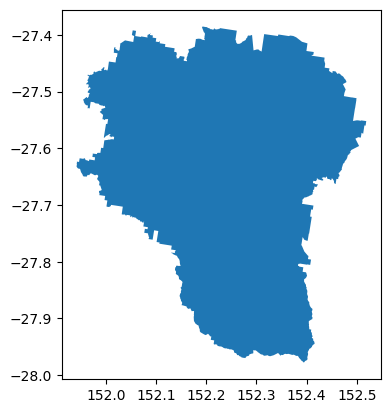

In [10]:
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Extract the .kml from the .kmz
kmz_path = "lga-lockyer-valley.kmz"
with zipfile.ZipFile(kmz_path, 'r') as z:
    kml_filename = [f for f in z.namelist() if f.endswith('.kml')][0]
    z.extract(kml_filename, "temp/")   # extract to a temp folder
    kml_path = "temp/" + kml_filename

# Step 2: Read KML with GeoPandas
gdf = gpd.read_file(kml_path, driver="KML")

print(gdf.head())
gdf.plot()


C:\Users\u1171032\AppData\Local\Temp\ipykernel_45004\2630772271.py:37: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if cell.intersects(gdf.unary_union):


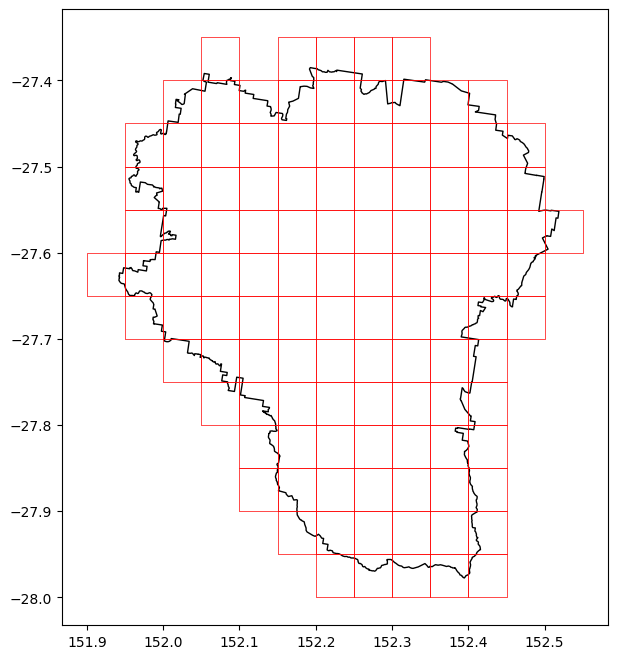

In [12]:
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

# Step 1: Extract the .kml from the .kmz
kmz_path = "lga-lockyer-valley.kmz"
with zipfile.ZipFile(kmz_path, 'r') as z:
    kml_filename = [f for f in z.namelist() if f.endswith('.kml')][0]
    z.extract(kml_filename, "temp/")   # extract to a temp folder
    kml_path = "temp/" + kml_filename

# Step 2: Read KML with GeoPandas
gdf = gpd.read_file(kml_path, driver="KML")
gdf = gdf.to_crs(epsg=4326)  # Ensure WGS84 lat/lon

# Step 3: Get bounding box of LGA
minx, miny, maxx, maxy = gdf.total_bounds  # lon_min, lat_min, lon_max, lat_max

# Step 4: Align bounding box to SILO grid
def align_to_silo(value, step=0.05):
    return np.floor(value / step) * step

minx = align_to_silo(minx - 0.05)
maxx = align_to_silo(maxx + 0.05)
miny = align_to_silo(miny - 0.05)
maxy = align_to_silo(maxy + 0.05)

# Step 5: Create grid polygons
grid_polys = []
for lon in np.arange(minx, maxx, 0.05):
    for lat in np.arange(miny, maxy, 0.05):
        # cell boundaries
        cell = box(lon, lat, lon + 0.05, lat + 0.05)
        # keep only grids that intersect LGA
        if cell.intersects(gdf.unary_union):
            grid_polys.append(cell)

grid_gdf = gpd.GeoDataFrame(geometry=grid_polys, crs="EPSG:4326")

# Step 6: Plot LGA + grid
ax = gdf.plot(facecolor="none", edgecolor="black", figsize=(8,8))
grid_gdf.boundary.plot(ax=ax, color="red", linewidth=0.5)
plt.show()


C:\Users\u1171032\AppData\Local\Temp\ipykernel_45004\2921929429.py:38: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if cell.intersects(gdf.unary_union):


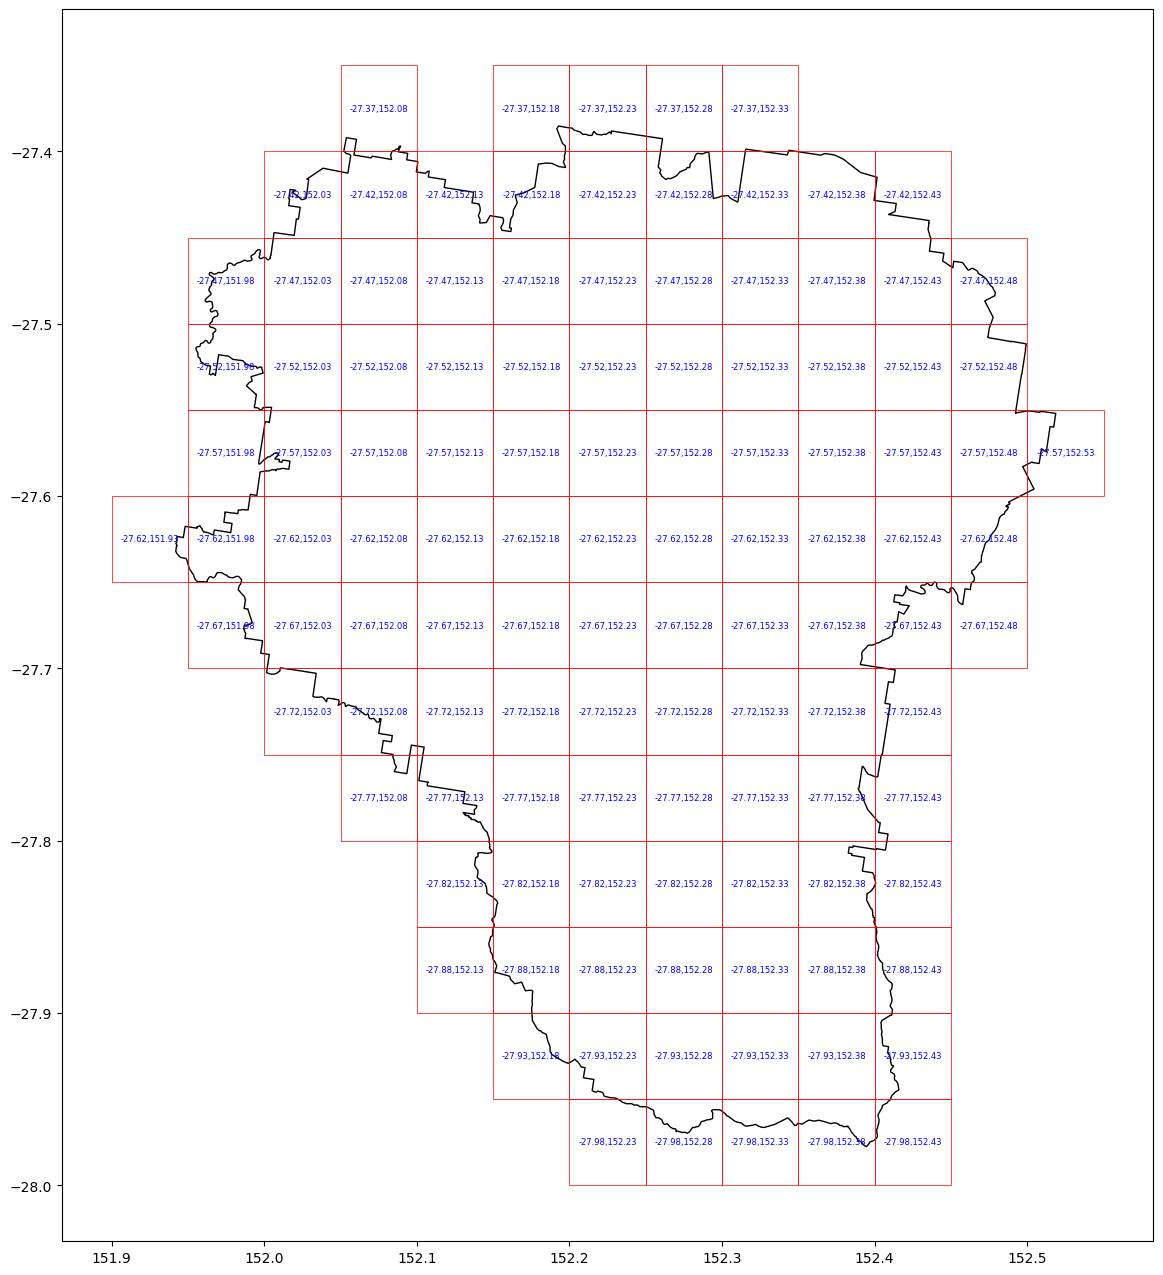

In [14]:
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

# Step 1: Extract the .kml from the .kmz
kmz_path = "lga-lockyer-valley.kmz"
with zipfile.ZipFile(kmz_path, 'r') as z:
    kml_filename = [f for f in z.namelist() if f.endswith('.kml')][0]
    z.extract(kml_filename, "temp/")   # extract to a temp folder
    kml_path = "temp/" + kml_filename

# Step 2: Read KML with GeoPandas
gdf = gpd.read_file(kml_path, driver="KML")
gdf = gdf.to_crs(epsg=4326)  # Ensure WGS84 lat/lon

# Step 3: Get bounding box of LGA
minx, miny, maxx, maxy = gdf.total_bounds  # lon_min, lat_min, lon_max, lat_max

# Step 4: Align bounding box to SILO grid
def align_to_silo(value, step=0.05):
    return np.floor(value / step) * step

minx = align_to_silo(minx - 0.05)
maxx = align_to_silo(maxx + 0.05)
miny = align_to_silo(miny - 0.05)
maxy = align_to_silo(maxy + 0.05)

# Step 5: Create grid polygons + store centers
grid_polys = []
grid_centers = []
for lon in np.arange(minx, maxx, 0.05):
    for lat in np.arange(miny, maxy, 0.05):
        # cell boundaries
        cell = box(lon, lat, lon + 0.05, lat + 0.05)
        # keep only grids that intersect LGA
        if cell.intersects(gdf.unary_union):
            grid_polys.append(cell)
            # center point (SILO reference)
            grid_centers.append((lat + 0.025, lon + 0.025))

grid_gdf = gpd.GeoDataFrame(geometry=grid_polys, crs="EPSG:4326")

# Step 6: Plot LGA + grid + labels
fig, ax = plt.subplots(figsize=(16, 16))
gdf.plot(ax=ax, facecolor="none", edgecolor="black")
grid_gdf.boundary.plot(ax=ax, color="red", linewidth=0.5)

# Add labels (SILO grid center points)
for lat, lon in grid_centers:
    ax.text(lon, lat, f"{lat:.2f},{lon:.2f}", fontsize=6,
            ha='center', va='center', color="blue")

plt.show()


C:\Users\u1171032\AppData\Local\Temp\ipykernel_45004\3669392795.py:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if cell.intersects(gdf.unary_union):


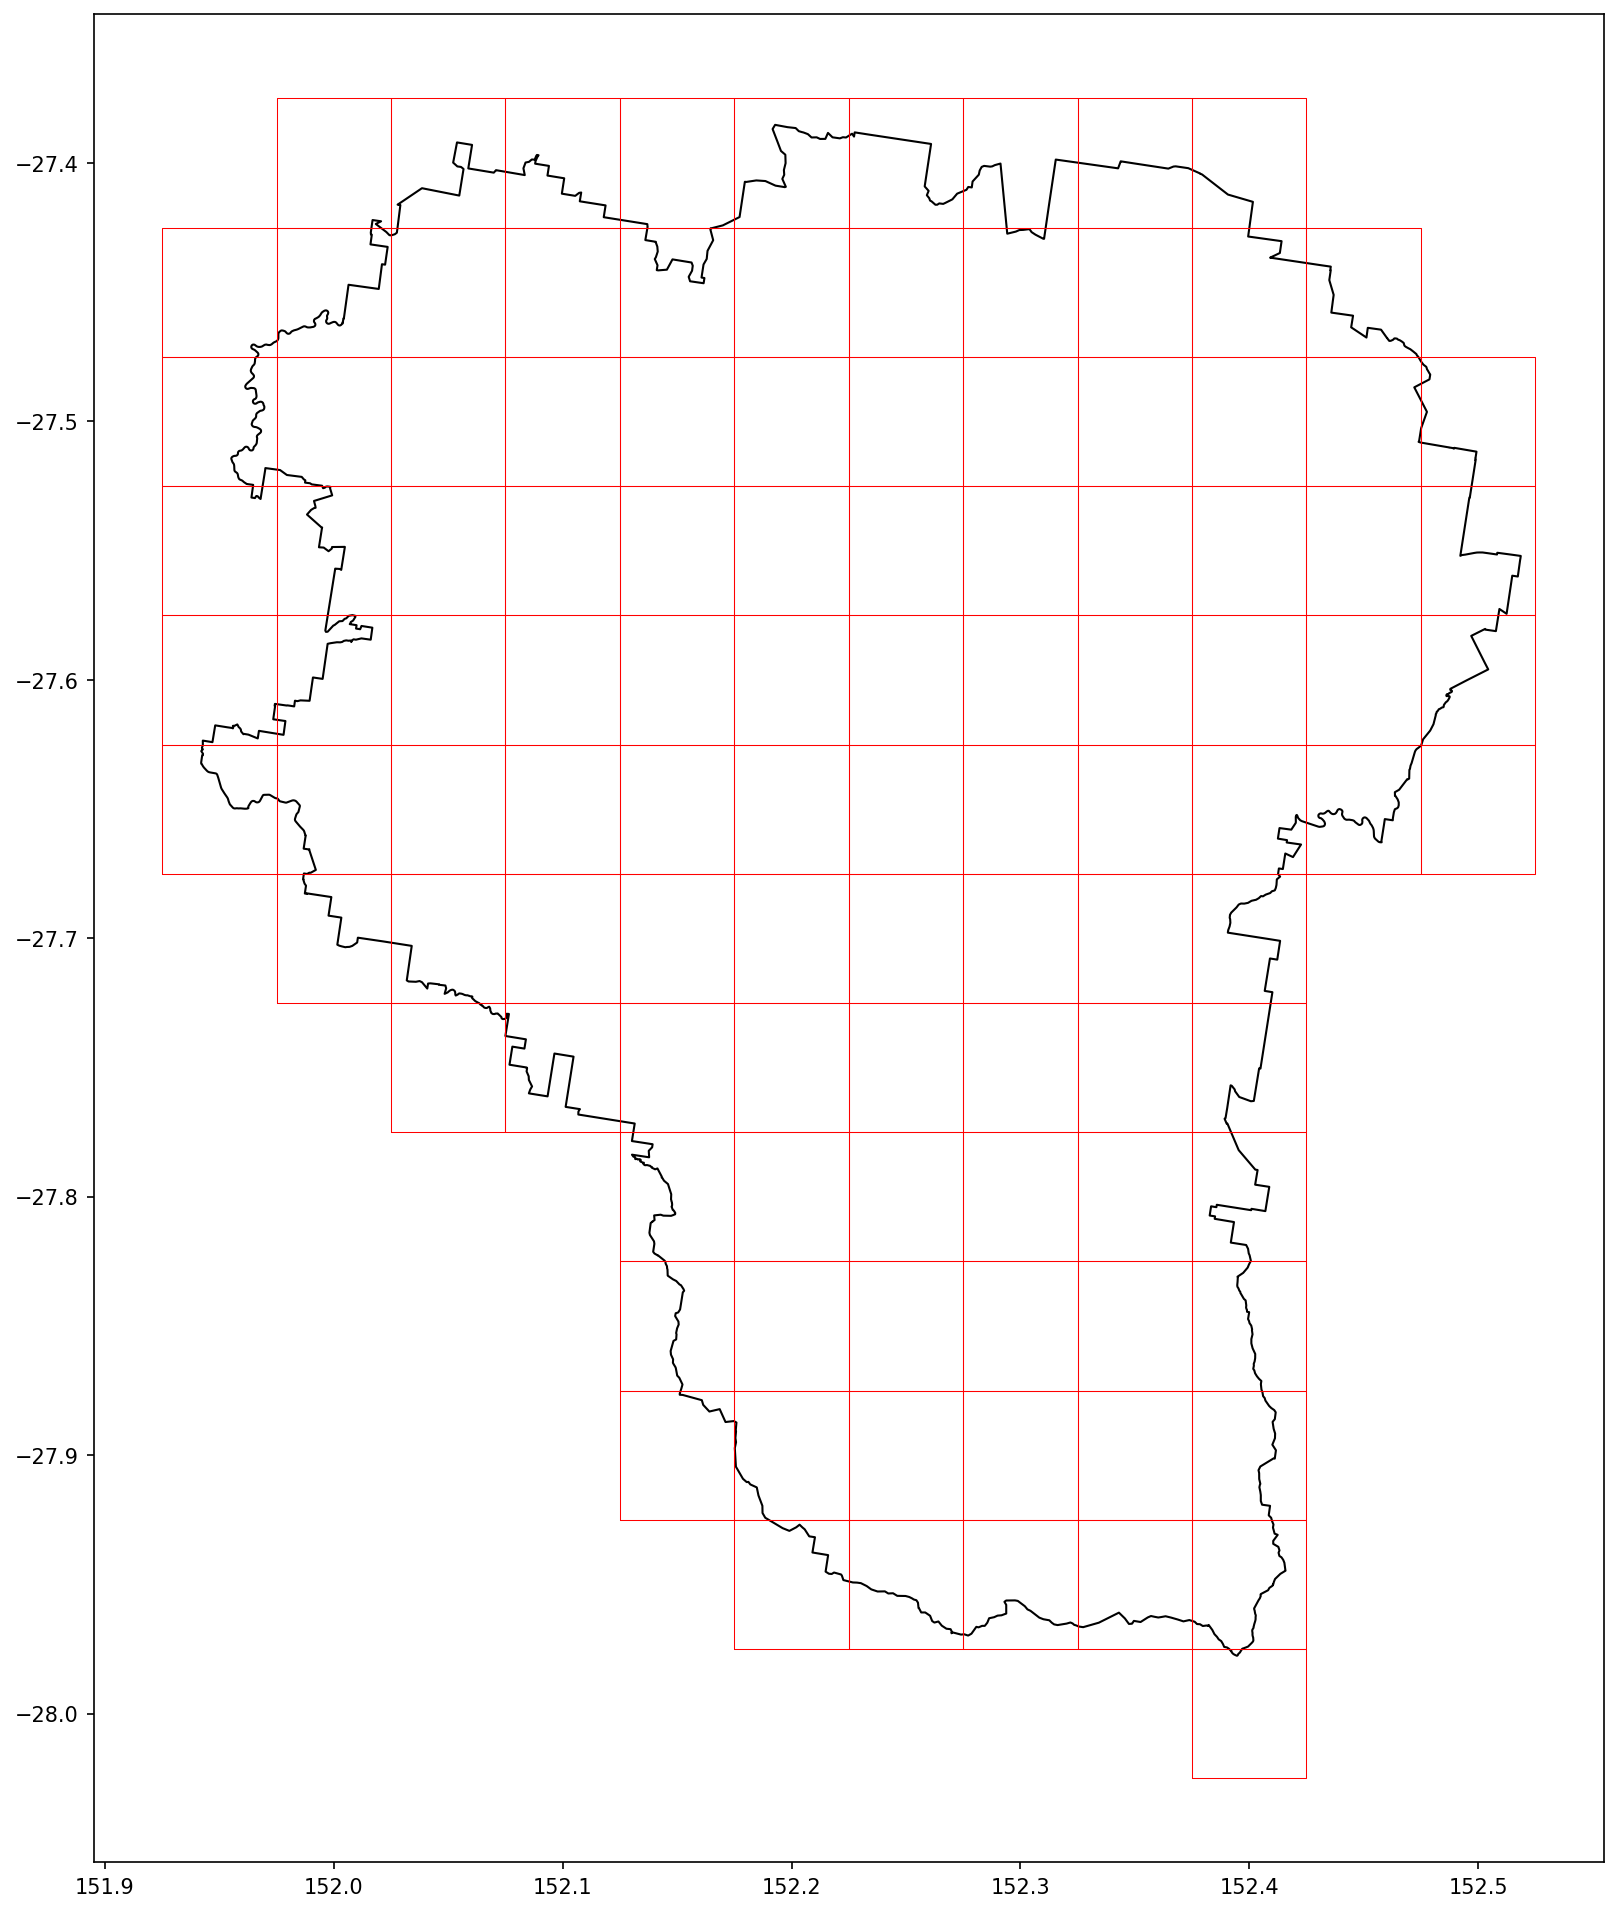

In [23]:
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

# Step 1: Extract KML from KMZ
kmz_path = "lga-lockyer-valley.kmz"
with zipfile.ZipFile(kmz_path, 'r') as z:
    kml_filename = [f for f in z.namelist() if f.endswith('.kml')][0]
    z.extract(kml_filename, "temp/")
    kml_path = "temp/" + kml_filename

# Step 2: Read KML
gdf = gpd.read_file(kml_path, driver="KML")
gdf = gdf.to_crs(epsg=4326)

# Step 3: Bounding box
minx, miny, maxx, maxy = gdf.total_bounds

# Step 4: Generate SILO-aligned centers
def nearest_silo(value):
    """Snap to nearest multiple of 0.05 (0.05 * round(value / 0.05))"""
    return round(value * 20) / 20

lat_centers = np.arange(nearest_silo(miny), nearest_silo(maxy) + 0.05, 0.05)
lon_centers = np.arange(nearest_silo(minx), nearest_silo(maxx) + 0.05, 0.05)

# Step 5: Create grids
grid_polys = []
grid_centers = []
for lon in lon_centers:
    for lat in lat_centers:
        cell = box(lon - 0.025, lat - 0.025, lon + 0.025, lat + 0.025)
        if cell.intersects(gdf.unary_union):
            grid_polys.append(cell)
            grid_centers.append((lat, lon))

grid_gdf = gpd.GeoDataFrame(geometry=grid_polys, crs="EPSG:4326")

# Step 6: Plot LGA + grid + labels
fig, ax = plt.subplots(figsize=(16, 16), dpi=150)
gdf.plot(ax=ax, facecolor="none", edgecolor="black")
grid_gdf.boundary.plot(ax=ax, color="red", linewidth=0.5)

# for lat, lon in grid_centers:
#     ax.text(lon, lat, f"{lat:.2f},{lon:.2f}", fontsize=6, ha='center', va='center', color='blue')

plt.show()


In [18]:
import pandas as pd

# Step 1: Create a DataFrame of SILO grid centers inside the LGA
silo_points = pd.DataFrame(grid_centers, columns=['Latitude', 'Longitude'])

# Step 2: Optional – sort by latitude and longitude
silo_points = silo_points.sort_values(by=['Latitude', 'Longitude']).reset_index(drop=True)

# Step 3: Save to CSV for reuse
silo_points.to_csv("lockyer_valley_silo_grid.csv", index=False)

print(f"Total SILO grid points inside LGA: {len(silo_points)}")
print(silo_points.head(10))


Total SILO grid points inside LGA: 109
   Latitude  Longitude
0    -28.00     152.40
1    -27.95     152.20
2    -27.95     152.25
3    -27.95     152.30
4    -27.95     152.35
5    -27.95     152.40
6    -27.90     152.15
7    -27.90     152.20
8    -27.90     152.25
9    -27.90     152.30


C:\Users\u1171032\AppData\Local\Temp\ipykernel_47228\3263562262.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if cell.intersects(gdf.unary_union):


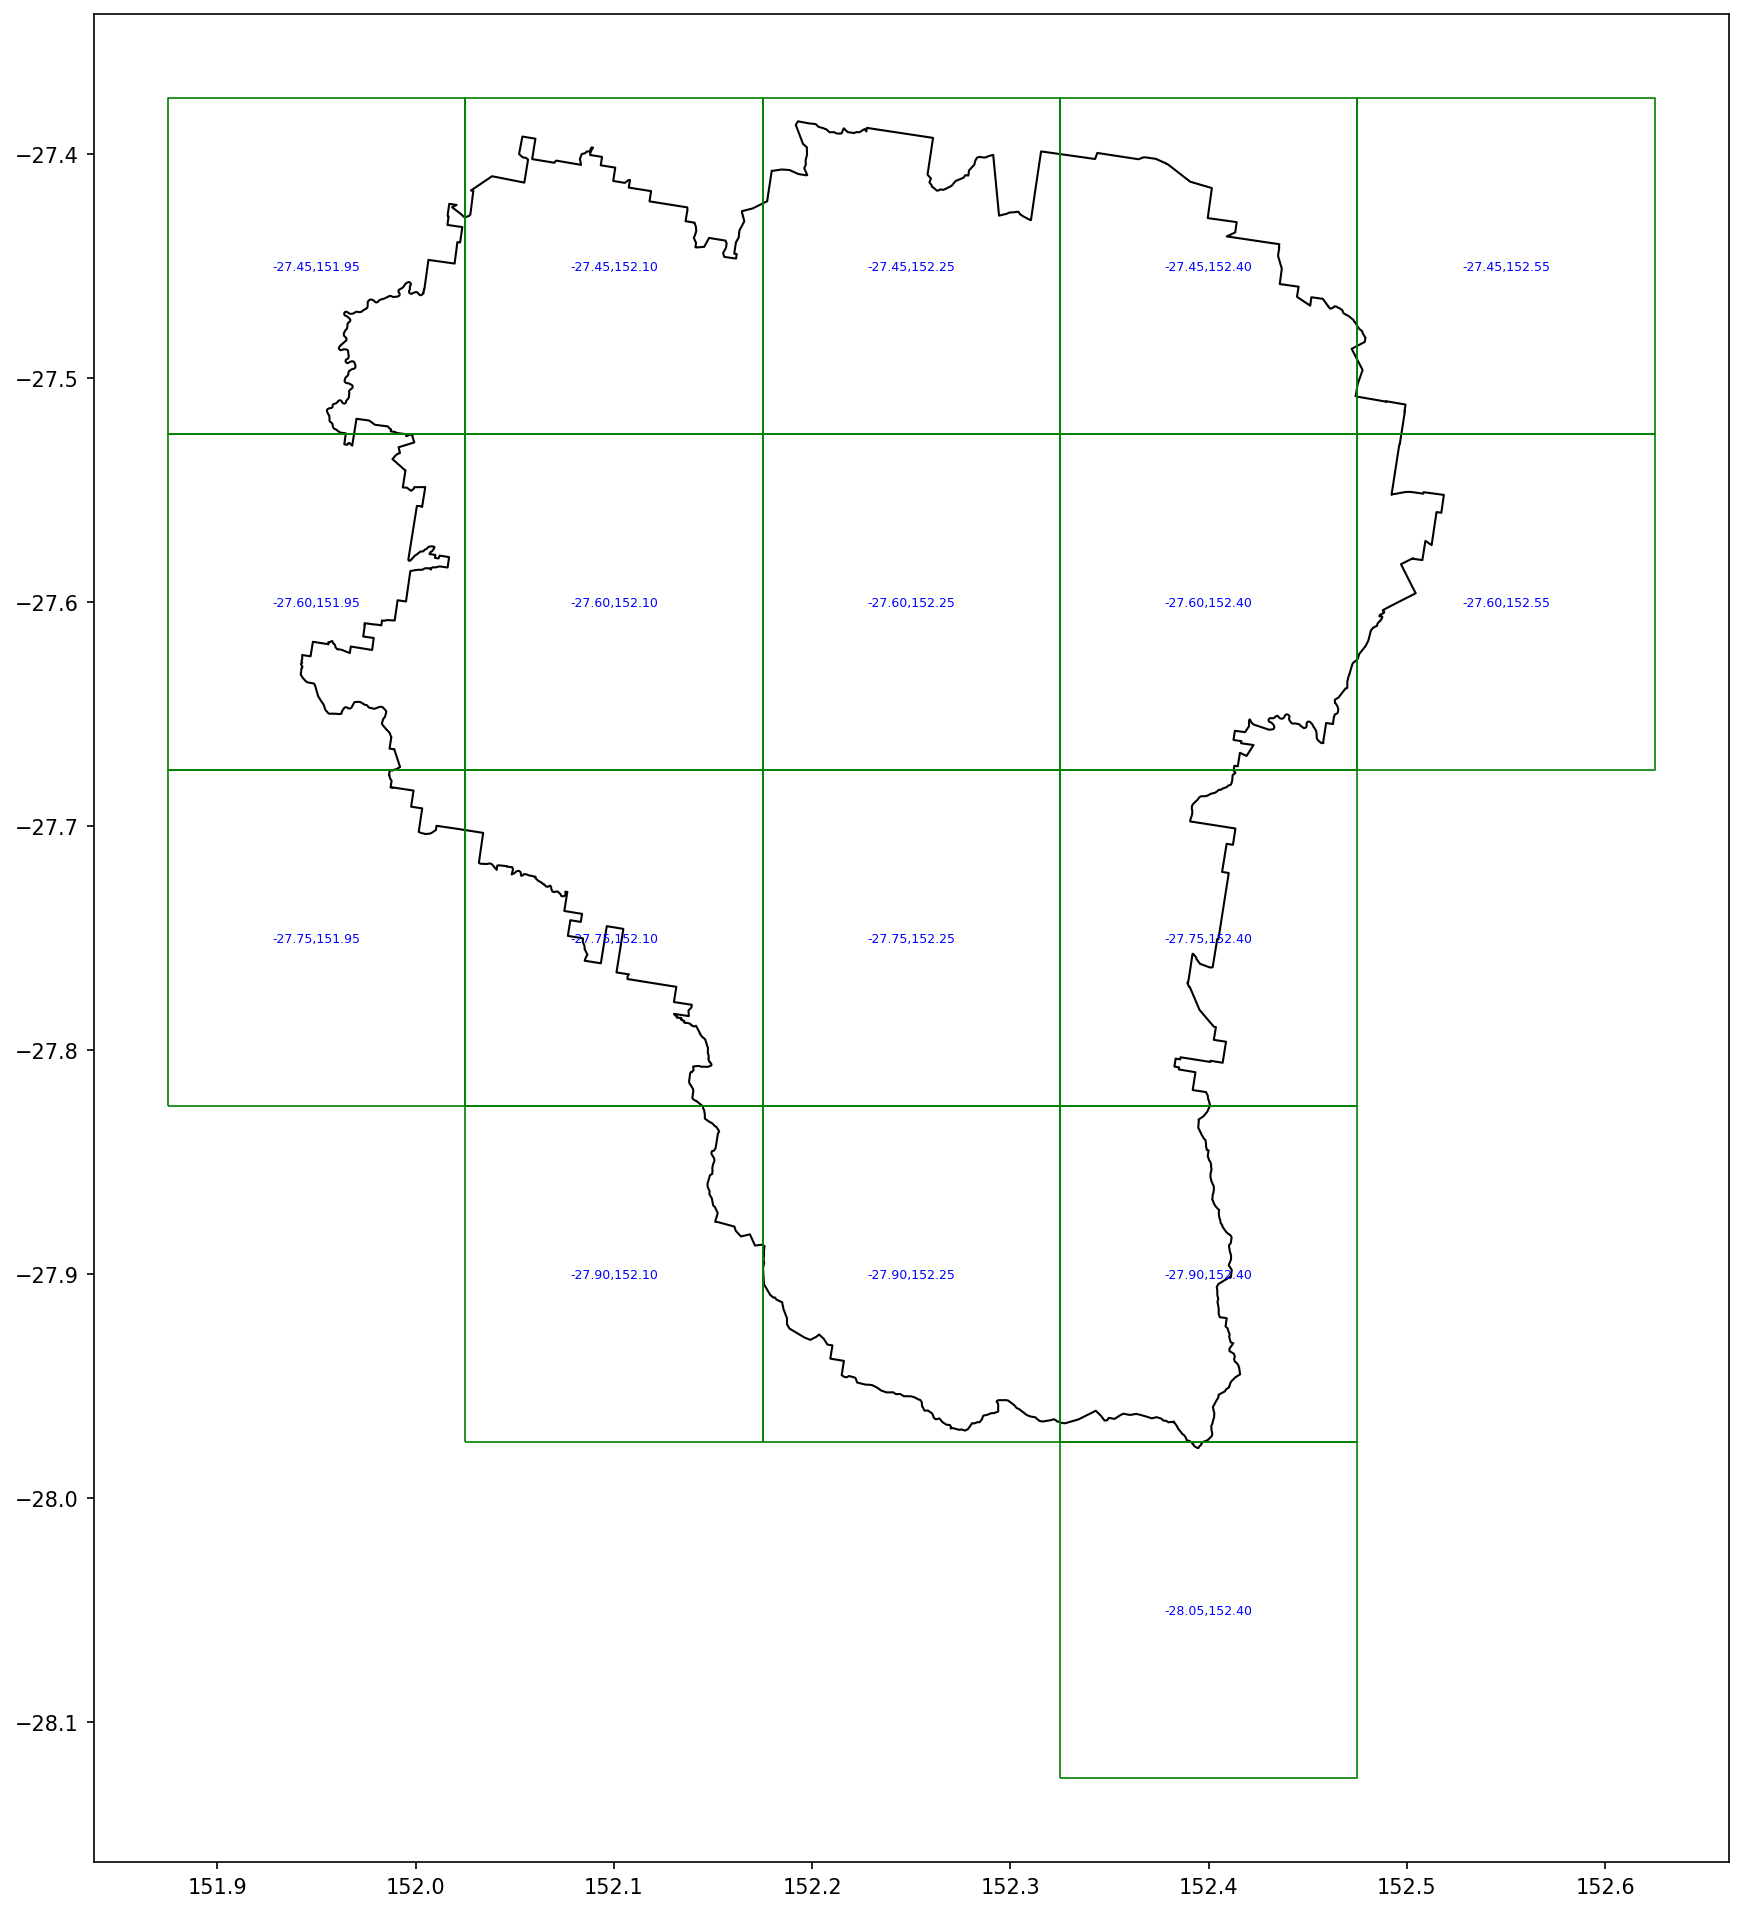

In [3]:
# Step 4 (modified): Generate SILO-aligned centers but with step 0.15 instead of 0.05
def nearest_silo(value, step=0.05):
    return round(value / step) * step

# Use step = 0.15 for merging 3x3
lat_centers = np.arange(nearest_silo(miny, 0.15), nearest_silo(maxy, 0.15) + 0.15, 0.15)
lon_centers = np.arange(nearest_silo(minx, 0.15), nearest_silo(maxx, 0.15) + 0.15, 0.15)

# Step 5 (modified): Create 0.15° x 0.15° grids
grid_polys = []
grid_centers = []
for lon in lon_centers:
    for lat in lat_centers:
        cell = box(lon - 0.075, lat - 0.075, lon + 0.075, lat + 0.075)  # half of 0.15
        if cell.intersects(gdf.unary_union):
            grid_polys.append(cell)
            grid_centers.append((lat, lon))

merged_grid_gdf = gpd.GeoDataFrame(geometry=grid_polys, crs="EPSG:4326")

# Step 6: Plot
fig, ax = plt.subplots(figsize=(16, 16), dpi=150)
gdf.plot(ax=ax, facecolor="none", edgecolor="black")
merged_grid_gdf.boundary.plot(ax=ax, color="green", linewidth=0.8)

for lat, lon in grid_centers:
    ax.text(lon, lat, f"{lat:.2f},{lon:.2f}", fontsize=6, ha='center', va='center', color='blue')

plt.show()


In [7]:
import pandas as pd

# Step A: Ensure centroids for small grids
grid_gdf["centroid"] = grid_gdf.centroid
grid_gdf["lat"] = grid_gdf["centroid"].y
grid_gdf["lon"] = grid_gdf["centroid"].x

# Step B: Assign group IDs (snap to 0.15°)
def snap(value, step=0.15):
    return np.floor(value / step) * step

grid_gdf["group_lon"] = grid_gdf["lon"].map(lambda x: snap(x, 0.15))
grid_gdf["group_lat"] = grid_gdf["lat"].map(lambda y: snap(y, 0.15))
grid_gdf["group_id"] = grid_gdf["group_lat"].astype(str) + "_" + grid_gdf["group_lon"].astype(str)

# Step C: Collect 9 grids per merged cell
merged_groups = (
    grid_gdf.groupby("group_id")[["lat", "lon"]]
    .apply(lambda df: list(zip(df["lat"], df["lon"])))
    .reset_index()
    .rename(columns={0: "small_grid_centers"})
)

# Step D: Flatten into columns
rows = []
for _, row in merged_groups.iterrows():
    group_id = row["group_id"]
    coords = row["small_grid_centers"]
    # pad if less than 9 (edge case at boundary)
    coords = coords + [(None, None)] * (9 - len(coords))
    flat = [group_id] + [c for pair in coords for c in pair]
    rows.append(flat)

# Define column names
cols = ["group_id"] + [f"lat{i+1}" for i in range(9)] + [f"lon{i+1}" for i in range(9)]

# Build DataFrame
csv_df = pd.DataFrame(rows, columns=cols)

# Save to CSV
csv_df.to_csv("merged_grid_boxes.csv", index=False)

print("✅ Saved merged grid boxes to merged_grid_boxes.csv")


✅ Saved merged grid boxes to merged_grid_boxes.csv


C:\Users\u1171032\AppData\Local\Temp\ipykernel_47228\1749809194.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_gdf["centroid"] = grid_gdf.centroid


In [8]:
from shapely.geometry import Point

# Assuming you have your original SILO 0.05° centers:
silo_lats = np.arange(nearest_silo(miny, 0.05), nearest_silo(maxy, 0.05) + 0.05, 0.05)
silo_lons = np.arange(nearest_silo(minx, 0.05), nearest_silo(maxx, 0.05) + 0.05, 0.05)

# Create a list of original SILO points
silo_points = [Point(lon, lat) for lat in silo_lats for lon in silo_lons]

# Dictionary to store merged grid info
merged_grid_dict = {}

for center in grid_centers:
    lat_c, lon_c = center
    cell_key = f"{lat_c:.2f}_{lon_c:.2f}"
    
    # Define the 0.15° cell polygon
    cell_poly = box(lon_c - 0.075, lat_c - 0.075, lon_c + 0.075, lat_c + 0.075)
    
    # Find which 0.05° SILO points are inside this 0.15° cell
    points_in_cell = [f"{p.y:.2f}_{p.x:.2f}" for p in silo_points if cell_poly.contains(p)]
    
    merged_grid_dict[cell_key] = points_in_cell

# Print in desired format
for k, v in merged_grid_dict.items():
    print(f"{k}: {v}")


-27.75_151.95: ['-27.80_151.95', '-27.80_152.00', '-27.75_151.95', '-27.75_152.00', '-27.70_151.95', '-27.70_152.00']
-27.60_151.95: ['-27.65_151.95', '-27.65_152.00', '-27.60_151.95', '-27.60_152.00', '-27.55_151.95', '-27.55_152.00']
-27.45_151.95: ['-27.50_151.95', '-27.50_152.00', '-27.45_151.95', '-27.45_152.00', '-27.40_151.95', '-27.40_152.00']
-27.90_152.10: ['-27.95_152.05', '-27.95_152.10', '-27.95_152.15', '-27.90_152.05', '-27.90_152.10', '-27.90_152.15', '-27.85_152.05', '-27.85_152.10', '-27.85_152.15']
-27.75_152.10: ['-27.80_152.05', '-27.80_152.10', '-27.80_152.15', '-27.75_152.05', '-27.75_152.10', '-27.75_152.15', '-27.70_152.05', '-27.70_152.10', '-27.70_152.15']
-27.60_152.10: ['-27.65_152.05', '-27.65_152.10', '-27.65_152.15', '-27.60_152.05', '-27.60_152.10', '-27.60_152.15', '-27.55_152.05', '-27.55_152.10', '-27.55_152.15']
-27.45_152.10: ['-27.50_152.05', '-27.50_152.10', '-27.50_152.15', '-27.45_152.05', '-27.45_152.10', '-27.45_152.15', '-27.40_152.05', '-27

In [9]:
# Step 1: Dictionary to store merged grids
merged_grid_dict = {}

# Step 2: Loop through each merged 0.15° grid center
for lat_c, lon_c in grid_centers:
    cell_key = f"{lat_c:.2f}_{lon_c:.2f}"
    
    # Create 9 smaller 0.05° grid centers inside this 0.15° cell
    sub_lats = np.arange(lat_c - 0.075 + 0.025, lat_c + 0.075, 0.05)  # center of each subcell
    sub_lons = np.arange(lon_c - 0.075 + 0.025, lon_c + 0.075, 0.05)
    
    # Generate the 9 subgrid names
    subgrid_names = [f"{lat:.2f}_{lon:.2f}" for lat in sub_lats for lon in sub_lons]
    
    merged_grid_dict[cell_key] = subgrid_names

# Step 3: Print results
for k, v in merged_grid_dict.items():
    print(f"{k}: {v}")


-27.75_151.95: ['-27.80_151.90', '-27.80_151.95', '-27.80_152.00', '-27.75_151.90', '-27.75_151.95', '-27.75_152.00', '-27.70_151.90', '-27.70_151.95', '-27.70_152.00']
-27.60_151.95: ['-27.65_151.90', '-27.65_151.95', '-27.65_152.00', '-27.60_151.90', '-27.60_151.95', '-27.60_152.00', '-27.55_151.90', '-27.55_151.95', '-27.55_152.00']
-27.45_151.95: ['-27.50_151.90', '-27.50_151.95', '-27.50_152.00', '-27.45_151.90', '-27.45_151.95', '-27.45_152.00', '-27.40_151.90', '-27.40_151.95', '-27.40_152.00']
-27.90_152.10: ['-27.95_152.05', '-27.95_152.10', '-27.95_152.15', '-27.90_152.05', '-27.90_152.10', '-27.90_152.15', '-27.85_152.05', '-27.85_152.10', '-27.85_152.15']
-27.75_152.10: ['-27.80_152.05', '-27.80_152.10', '-27.80_152.15', '-27.75_152.05', '-27.75_152.10', '-27.75_152.15', '-27.70_152.05', '-27.70_152.10', '-27.70_152.15']
-27.60_152.10: ['-27.65_152.05', '-27.65_152.10', '-27.65_152.15', '-27.60_152.05', '-27.60_152.10', '-27.60_152.15', '-27.55_152.05', '-27.55_152.10', '-2

In [11]:
import os
import shutil

# Path where all the 0.05° CSV files are stored
source_folder = r"data\cleaned_All"

# Path where merged folders should be created
destination_folder = r"data\cleaned_station_data"

# Ensure destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# merged_grid_dict from previous step
# Example: {"-27.45_151.95": ["-27.40_151.90", "-27.40_151.95", ...]}
# Make sure you already have merged_grid_dict

for merged_name, subgrids in merged_grid_dict.items():
    # Create folder for each merged grid
    merged_path = os.path.join(destination_folder, merged_name)
    os.makedirs(merged_path, exist_ok=True)
    
    # Copy the 9 CSV files into this folder
    for subgrid in subgrids:
        file_name = f"{subgrid}.csv"
        source_file = os.path.join(source_folder, file_name)
        if os.path.exists(source_file):
            shutil.copy(source_file, merged_path)
        else:
            print(f"Warning: {file_name} not found in source folder.")
